# Audio Stuff

## Imports

In [410]:
import numpy as np
import wave
import matplotlib.pyplot as plt
from scipy import signal
import librosa

## Function Definitions

In [452]:
# Create a single period of sine wave.
n = round(sample_rate/frequency)
periods = round(frequency*duration)
t = np.linspace(0.0, 1, int(sample_rate))

freqs = { 'C' : 261.63,
          'C#' : 277.18,
          'D' : 293.66,
          'D#' : 311.13,
          'E' : 329.63,
          'F' : 349.23,
          'F#' : 369.99,
          'G' : 392,
          'G#' : 415.3,
          'A' : 440,
          'A#' : 466.16,
          'B' : 493.88
        }

def getNote(note):
    note_ = note[0:-1]
    octave = int(note[-1])
    return np.sin(2*t*np.pi*freqs[note_]*2**(octave - 4))

In [390]:
def save(filename, data):
    # open WAV file and write data
    with wave.open(filename+'.wav', 'w') as wavfile:
        wavfile.setnchannels(num_channels)
        wavfile.setsampwidth(sample_width)
        wavfile.setframerate(sample_rate)
    
        wavfile.writeframes(data)

In [350]:
def convert_to_decibel(arr):
    ref = 1
    if arr!=0:
        return 20 * np.log10(abs(arr) / ref)
        
    else:
        return -60

dB = [convert_to_decibel(i) for i in data]

## Jingle Bells

In [436]:
# set up WAV file parameters
num_channels    = 1                             # mono audio
sample_width    = 2                            # 8 bits(1 byte)/sample
sample_rate     = 44.1e3                        # 44.1k samples/second
frequency       = 233.08                          # 440 Hz
duration        = 20                            # play for this many seconds

In [480]:
E = getNote('E4')
silence = 0*t
G = getNote('G4')
C = getNote('C4')
D = getNote('D4')
F = getNote('F4')
A = getNote('A4')
B = getNote('B4')
# frequency_t = frequency*(np.sin(np.pi*2*t/2) + 1 + scale)/scale
data = (127*np.block([E, E, E, silence, E, E, E, silence, E, G, C, D, E, F, F, F, F, silence, F, E, E, E, E, G, G, F, D, C])).astype(np.int8)
save('jinglebells', data)

In [481]:
x,sr = librosa.load('jinglebells.wav')

S= librosa.magphase(librosa.stft(x, window=np.ones, center=False))[0]


rmse = librosa.feature.rms(S = S)

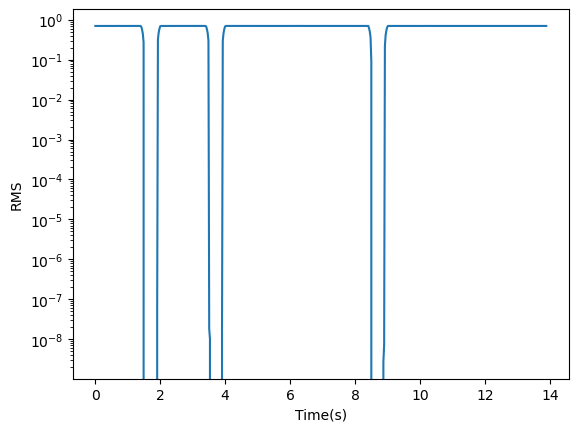

In [482]:
times = librosa.times_like(rmse)
plt.semilogy(times, rmse[0])
plt.ylabel('RMS')
plt.xlabel('Time(s)')
plt.show()

## Californication
An attempt

In [397]:
A1 = getNote('A1')
D4 = getNote('D4')
E4 = getNote('E4')
F1 = getNote('F1')
G2 = getNote('G2')
C4 = getNote('C4')
C3 = getNote('C3')
A2 = getNote('A2')
F3 = getNote('F3')
F4 = getNote('F4')

# I tried...
data = (127*np.block([A2, A2, E4, E4, D4, E4, D4, C4, F3, F3, D4, D4, C4, F3, F3, F4, F4, D4, C3, C3, G2, G2, F1, F1, A1, A1])).astype(np.int8)
save('californication', data)

In [335]:
# Create a single period of sine wave.
n = round(sample_rate/frequency)
periods = round(frequency*duration)
t = np.linspace(0.0, 1, int(sample_rate))
scale = 100
frequency_t = frequency*(np.sin(np.pi*2*t/2) + 1 + scale)/scale
data = (127*(np.sin(2*np.pi*16.35*3*t) + np.sin(2*np.pi*25.96*3*t) + np.sin(2*np.pi*24.5*3*t))).astype(np.int8) 